![image](https://user-images.githubusercontent.com/50051312/68091596-abd14180-fe4f-11e9-8c5e-5f629ab0426b.png)


### PERÍODO ACADÉMICO: 2016-B

### ASIGNATURA:  INTELIGENCIA ARTIFICIAL   GRUPO: GR1

### PROFESOR: Ing. MSc. Myriam Hernández A.

### TIPO DE INSTRUMENTO: PROYECTO BIMESTRAL

### DESCRIPCIÓN: INFORME

### FECHA DE ENTREGA LÍMITE: 11/11/2019

### Integrantes:
* Edwin Cocha
* Cristhian Jumbo
* Billy Proano

## Proyecto de primer bimestre
### Implementar la busqueda mas optima mapa de bulgaria
* Realizar en python un programa que me permita realizarlo de manera optima 


### 1 OBJETIVOS

#### 1.1 Objetivo General

- Aplicar todos los conocimientos adquiridos durante el el primer bimestre en especial las busquedas informadas y las no informadas, la implementacion del algoritmo mas optimo de busquedas para dara solucion al problema del mapa de bulgaria. 

#### 1.2 Objetivo Especificos

- Implementar el algoritmo de busqueda A* para la ruta entre Arad y Bucarest utilizando el lenguaje de programacion en de python. 
- Interpretar las entradas y las salidas de la solucion.

### 2 MARCO TEORICO

// busqueda informadas 
// busqueda informada algoritmo A*

### 3 PROCEDIMIENTO Y DESARROLLO

![image](https://user-images.githubusercontent.com/50051312/68638946-1843e480-04d1-11ea-93d7-d95079630be1.png)
Fig 1. Muestra el grafo del mapa de Rumania y la matriz heuristica 

### Desarrollo de la implementación
* Importación de libreria utilizadas en la implementación

In [66]:
import matplotlib.pyplot as plt
import networkx as nx
from time import time
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from IPython.display import display

* Todos los posibles caminos para las distintas ciudades

In [67]:
GRAFO = {\
            'Arad': {'Sibiu': 140, 'Zerind': 75, 'Timisoara': 118},\
            'Zerind': {'Arad': 75, 'Oradea': 71},\
            'Oradea': {'Zerind': 71, 'Sibiu': 151},\
            'Sibiu': {'Arad': 140, 'Oradea': 151, 'Fagaras': 99, 'Rimnicu': 80},\
            'Timisoara': {'Arad': 118, 'Lugoj': 111},\
            'Lugoj': {'Timisoara': 111, 'Mehadia': 70},\
            'Mehadia': {'Lugoj': 70, 'Drobeta': 75},\
            'Drobeta': {'Mehadia': 75, 'Craiova': 120},\
            'Craiova': {'Drobeta': 120, 'Rimnicu': 146, 'Pitesti': 138},\
            'Rimnicu': {'Sibiu': 80, 'Craiova': 146, 'Pitesti': 97},\
            'Fagaras': {'Sibiu': 99, 'Bucharest': 211},\
            'Pitesti': {'Rimnicu': 97, 'Craiova': 138, 'Bucharest': 101},\
            'Bucharest': {'Fagaras': 211, 'Pitesti': 101, 'Giurgiu': 90, 'Urziceni': 85},\
            'Giurgiu': {'Bucharest': 90},\
            'Urziceni': {'Bucharest': 85, 'Vaslui': 142, 'Hirsova': 98},\
            'Hirsova': {'Urziceni': 98, 'Eforie': 86},\
            'Eforie': {'Hirsova': 86},\
            'Vaslui': {'Iasi': 92, 'Urziceni': 142},\
            'Iasi': {'Vaslui': 92, 'Neamt': 87},\
            'Neamt': {'Iasi': 87}\
        }

* Transformación de el grafo del tipo diccionario a clase de tipo NetworkX 
    * La librería nos permite manipular de mejor manera los grafos.

In [68]:
# grafo del tipo <networkx.classes.graph.Graph at 0x7fbee9ede6a0>
G=nx.Graph(GRAFO)
G

* Gráfica del grafo definido de la siguente manera.

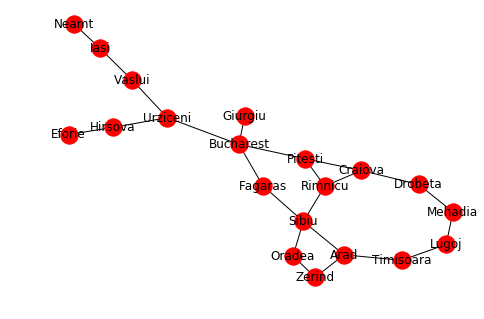

In [69]:
nx.draw(G, with_labels=True)

* Camino más óptimo desde el origen al destino usando como heurística la distnacia en linea recta
 * [ ] Parámetro origen: nombre de la ciudad de origen
 * [ ] Parámetro destino: nombre de la cuidad destion
 * [ ] Retorna el valor heurístico, coste, y el camino para el recorrido mas optimo


In [70]:
from time import time
def a_estrella(origen, destino):

    # AQUÍ LOS VALORES DE DISTANCIA DE LÍNEA RECTA DESDE LAS DISTINTAS CIUDADES HASTA BUCAREST QUE ES EL DESTINO
    dis_lineal = {\
                        'Arad': 366,\
                        'Zerind': 374,\
                        'Oradea': 380,\
                        'Sibiu': 253,\
                        'Timisoara': 329,\
                        'Lugoj': 244,\
                        'Mehadia': 241,\
                        'Drobeta': 242,\
                        'Craiova': 160,\
                        'Rimnicu': 193,\
                        'Fagaras': 176,\
                        'Pitesti': 100,\
                        'Bucharest': 0,\
                        'Giurgiu': 77,\
                        'Urziceni': 80,\
                        'Hirsova': 151,\
                        'Eforie': 161,\
                        'Vaslui': 199,\
                        'Iasi': 226,\
                        'Neamt': 234\
                    }
    from queue import PriorityQueue
    cola_prioridad, visitado = PriorityQueue(), {}
    cola_prioridad.put((dis_lineal[origen], 0, origen, [origen]))
    visitado[origen] = dis_lineal[origen]
    while not cola_prioridad.empty():
        (heuristica, costo, vertice, camino) = cola_prioridad.get()
        if vertice == destino:
            return heuristica, costo, camino
        for sig_nodo in GRAFO[vertice].keys():
            costo_actual = costo + GRAFO[vertice][sig_nodo]
            heuristica = costo_actual + dis_lineal[sig_nodo]
            if not sig_nodo in visitado or visitado[sig_nodo] >= heuristica:
                visitado[sig_nodo] = heuristica
                cola_prioridad.put((heuristica, costo_actual, sig_nodo, camino + [sig_nodo]))

* Declaración de la funcion principal para la ejecución

INGRESE LA CUIDAD DE ORIGEN : Arad
INGRESE LA CIUDAD OBJETIVO : Bucharest

CAMINO ÓPTIMO:
Tiempo de ejecucion: 0.1488 milisegundos.
HEURÍSTICA = 418
COSTO DEL CAMINO = 418
Arad -> Sibiu -> Rimnicu -> Pitesti -> Bucharest


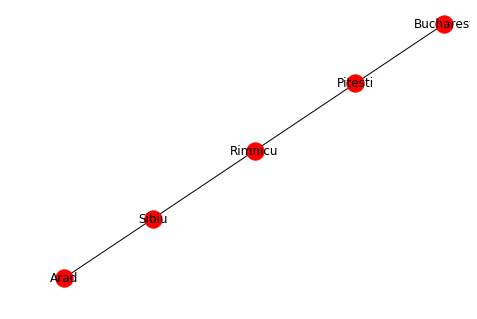

In [62]:
def main():
    """Función principal"""
    print('INGRESE LA CUIDAD DE ORIGEN :', end=' ')
    origen = input().strip()
    print('INGRESE LA CIUDAD OBJETIVO :', end=' ')
    objetivo = input().strip()
    if origen not in GRAFO or objetivo not in GRAFO:
        print('ERROR: LA CIUDAD NO EXISTE.')
    else:
        print('\nCAMINO ÓPTIMO:')
        start_time = time()
        heuristica, costo, camino_optimo = a_estrella(origen, objetivo)
        elapsed_time = (time() - start_time)*1000
        print("Tiempo de ejecucion: %.4f milisegundos." % elapsed_time)
        print('HEURÍSTICA =', heuristica)
        print('COSTO DEL CAMINO =', costo)
        print(' -> '.join(ciudad for ciudad in camino_optimo))
        G = nx.path_graph(camino_optimo)
        nx.draw(G, with_labels=True)

if __name__ == '__main__':
    main()

Output()

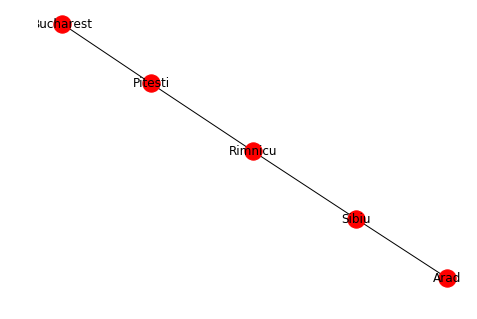

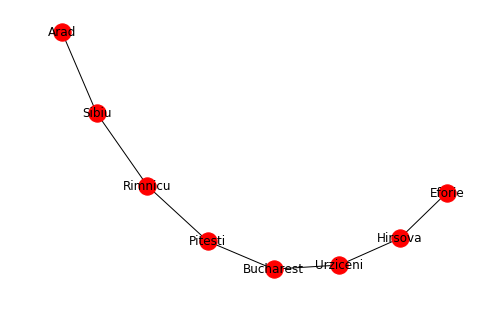

In [71]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from IPython.display import display
entrada = widgets.Text(description="Origen", continuous_update=False)
salida = widgets.Text(description="Objetivo", continuous_update=True)
button = widgets.Button(description="Buscar Optimo")
output = widgets.Output()
display(output)
def on_button_clicked(b):
    with output:
        heuristica, costo, camino_optimo = a_estrella(entrada.value, salida.value)
        print('HEURÍSTICA =', heuristica)
        print('COSTO DEL CAMINO =', costo)
        print(' -> '.join(ciudad for ciudad in camino_optimo))
        G = nx.path_graph(camino_optimo)
        nx.draw(G, with_labels=True)
        
button.on_click(on_button_clicked)
widgets.VBox([entrada,salida, button])